Dear students,

In this exercise, you are going to explore graphs. Based on the experiment reported at http://www.coppelia.io/2012/06/graphing-the-history-of-philosophy/, you are going to explore the dataset "p01_Influences.csv". In this file - which contains information gathered from Wikipedia - you will find in each row two names separated by commas. These names correspond to an influencer (the first) and the person that was influenced (the second).  

What is expected is to measure the ability of you to work together to solve a problem without all the necessary information available. In this sense, the task demands creativity, teamwork and coordination.  


Your task is to answer the questions:  

 1) What are the top 10 personalities in terms of power to generate influences?  
 2) What are the 10 personalities that were influenced by the most number of people?  
 3) What are the 5 major "clusters" of personalities who were influenced by a similar group of the same influencers?   
(Consider a cluster as the group of personalities who were influenced by the same Y influencers, Y being an arbitrary number. Start with Y = 2 and grow until there is no 2 people influenced by all of them.  

 4) What are the 5 major influences chains (eg, A -> B -> C -> ...)?  
 5) What are the countries that generated the greatest influential?  
 6) What are the areas of greatest influence?  
 7) Create a graphical representation of the graph  

Some notes and tips:  
- The taks may be discussed in a group, and code can be shared, but the work should be developed in pairs.  
- The notebook containing the methods used (code, etc.) should be sent to the e-mail <rsouza.fgv@gmail.com> with the title: "Terceira tarefa - MMD" and the names of the students.  

- There is no restriction as to the tools to be used, but I suggest that give a look at the module "NetworkX" Python. (Http://networkx.lanl.gov/)  
- Try to think about the task not as an evaluation but as a work on which depends your "promotion".    

Good luck, and hands-on !!  
Renato

Importing modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import pandas as pd
import networkx as nx
import codecs
from collections import Counter, OrderedDict
import os
%pylab inline

/usr/local/lib/python3.5/dist-packages/matplotlib/backends/backend_gtk3agg.py:18: UserWarning: The Gtk3Agg backend is known to not work on Python 3.x with pycairo. Try installing cairocffi.
  "The Gtk3Agg backend is known to not work on Python 3.x with pycairo. "


Populating the interactive namespace from numpy and matplotlib


Specifying the path to the files:

In [2]:
datapath = "../datasets/"
outputs = "../outputs/"
dataset1 = "influences.csv"

#### Loading the dataset

In [20]:
csvfile = open(os.path.join(datapath,dataset1)).readlines()

In [22]:
csvfile[0:5]

['"Influences","Influenced"\n',
 '"Ferdinand de Saussure","Jacques Lacan"\n',
 '"Georg Wilhelm Friedrich Hegel","Jacques Lacan"\n',
 '"Sigmund Freud","Jacques Lacan "\n',
 '"Benjamin Tucker","Robert Anton Wilson "\n']

#### Doing some cleaning  

In [23]:
lines = [line.strip() for line in csvfile]
lines2 = []
for line in lines:
    line = line.replace('",','";')
    line = line.replace('"','').strip()
    lines2.append(line)
for line in lines2[0:6]:
    print(line)

Influences;Influenced
Ferdinand de Saussure;Jacques Lacan
Georg Wilhelm Friedrich Hegel;Jacques Lacan
Sigmund Freud;Jacques Lacan
Benjamin Tucker;Robert Anton Wilson
Brian O'Nolan;Robert Anton Wilson


In [25]:
influences = np.array([(line.split(';')[0],line.split(';')[1]) for line in lines2])
print('Dimensions: {}'.format(influences.shape))
influences[:10]

Dimensions: (5009, 2)


array([['Influences', 'Influenced'],
       ['Ferdinand de Saussure', 'Jacques Lacan'],
       ['Georg Wilhelm Friedrich Hegel', 'Jacques Lacan'],
       ['Sigmund Freud', 'Jacques Lacan'],
       ['Benjamin Tucker', 'Robert Anton Wilson'],
       ["Brian O'Nolan", 'Robert Anton Wilson'],
       ['Terence McKenna', 'Robert Anton Wilson'],
       ['Colin Wilson', 'Robert Anton Wilson'],
       ['Robert W. Chambers', 'Robert Anton Wilson'],
       ['Aristotle', 'Alexander the Great']], 
      dtype='<U52')

Creating an ordered dict with the frequencies, using two special collections types:

http://docs.python.org/2/library/collections.html#collections.Counter

http://docs.python.org/2/library/collections.html#collections.OrderedDict

In [27]:
influencers_count = Counter(x[:,0])
influencers_count = Counter(x[:,1])
#y2 = OrderedDict(sorted(y.items(), key=lambda k: k[1], reverse=True))
#z2 = OrderedDict(sorted(z.items(), key=lambda k: k[1], reverse=True))
#y2

In [28]:
most_influencers = influencers_count.most_common(20)
most_influenced = influencers_count.most_common(20)

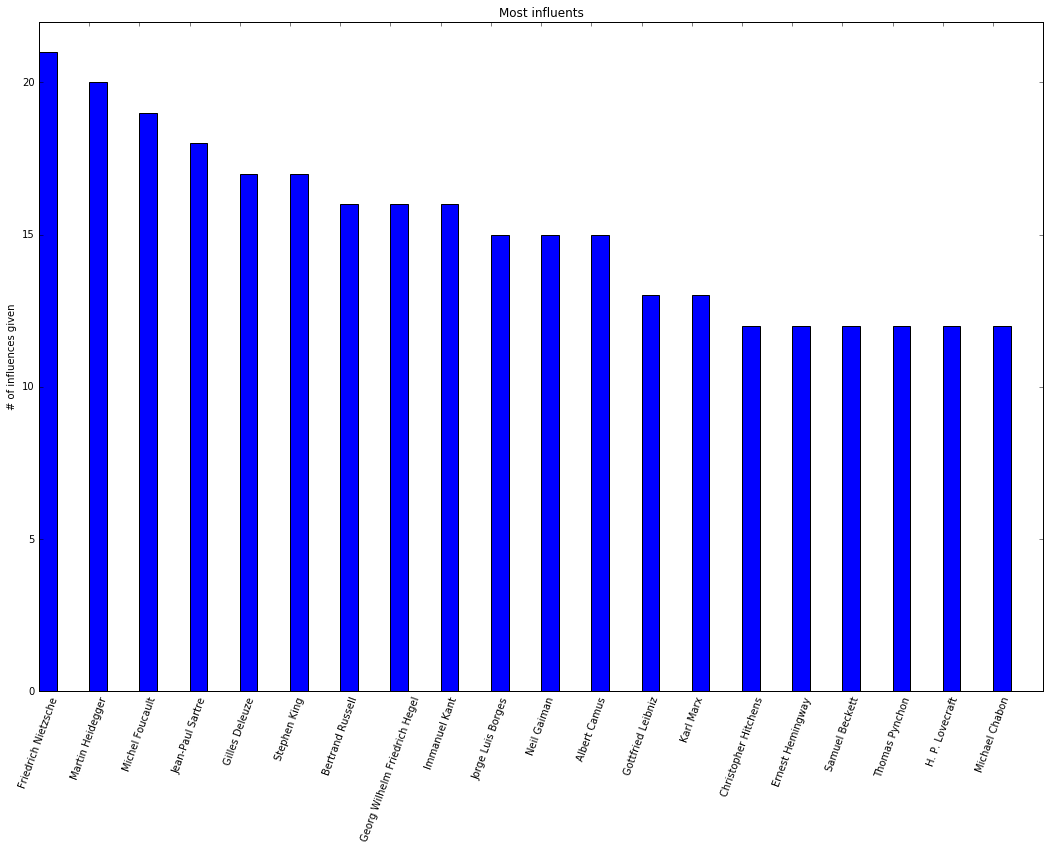

In [43]:
x = np.arange(len(most_influencers))
y = list(zip(*most_influencers))[1]
labels = list(zip(*most_influencers))[0]
y2max = max(y) + 1

plt.figure(figsize=(18,12), dpi=100)
plt.bar(x, y, width=0.35)
plt.xticks(x, labels)
plt.ylim(0, y2max)
plt.xticks(rotation=70)
plt.ylabel('# of influences given')
plt.title('Most influents')

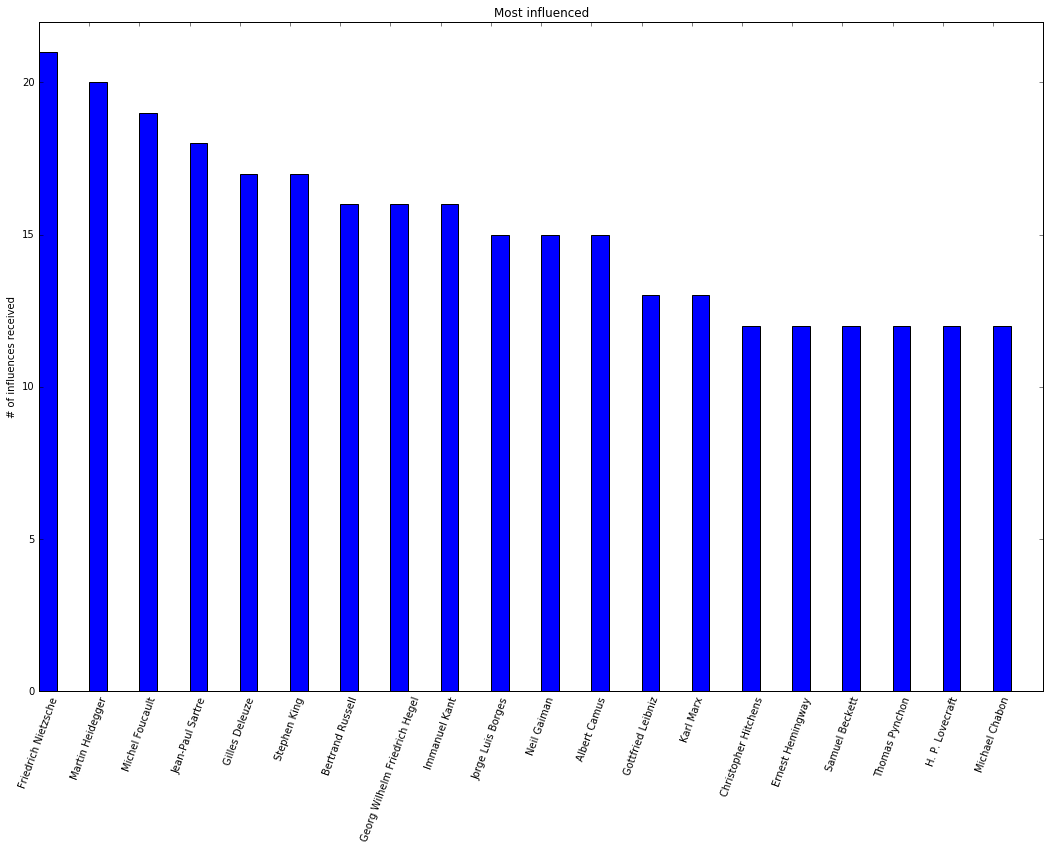

In [45]:
x = np.arange(len(most_influenced))
y = list(zip(*most_influenced))[1]
labels = list(zip(*most_influenced))[0]
y2max = max(y) + 1

plt.figure(figsize=(18,12), dpi=100)
plt.bar(x, y, width=0.35)
plt.xticks(x, labels)
plt.ylim(0, y2max)
plt.xticks(rotation=70)
plt.ylabel('# of influences received')
plt.title('Most influenced')

#### Converting to a Dataframe

In [11]:
pd_influences = pd.DataFrame(x[1:,:], columns = x[0])
pd_influences.head(10)

,Influences,Influenced
0,Ferdinand de Saussure,Jacques Lacan
1,Georg Wilhelm Friedrich Hegel,Jacques Lacan
2,Sigmund Freud,Jacques Lacan
3,Benjamin Tucker,Robert Anton Wilson
4,Brian O'Nolan,Robert Anton Wilson
5,Terence McKenna,Robert Anton Wilson
6,Colin Wilson,Robert Anton Wilson
7,Robert W. Chambers,Robert Anton Wilson
8,Aristotle,Alexander the Great
9,Charles Grafton Page,Alexander Graham Bell


#### Experimenting with NetworkX

Generating a graph with NetworkX. Note that the graph is too large for a full visualization  
That's why I have commented some lines and replaced for a limited version

In [13]:
limit = 30

G=nx.DiGraph()
#G.add_nodes_from(x[1:,0])
#G.add_nodes_from(x[1:,1])
G.add_nodes_from(x[1:limit,0])
G.add_nodes_from(x[1:limit,1])

#for i in range(1,len(x)):
for i in range(1,limit):
    G.add_edge(x[i,0],x[i,1])

print('Number of nodes is: {}'.format(G.number_of_nodes()))
print('Number of edges is: {}'.format(G.number_of_edges()))
print()
print(G.edges())

Number of nodes is: 42
Number of edges is: 29

[('Charles Grafton Page', 'Alexander Graham Bell'), ('Lord Byron', 'Anne Brontë'), ('Charles Lyell', 'Alfred Russel Wallace'), ('Charlotte Brontë', 'Anne Brontë'), ('Robert W. Chambers', 'Robert Anton Wilson'), ('William F. Buckley, Jr.', 'Barry Goldwater'), ('D. H. Lawrence', 'Anaïs Nin'), ('Otto Rank', 'Anaïs Nin'), ('Pierre-Joseph Proudhon', 'Benjamin Tucker'), ('Sigmund Freud', 'Jacques Lacan'), ('Benjamin Tucker', 'Robert Anton Wilson'), ('Robert Morison', 'Carl Linnaeus'), ('Colin Wilson', 'Robert Anton Wilson'), ('Terence McKenna', 'Robert Anton Wilson'), ('Maya Deren', 'Anaïs Nin'), ('Max Stirner', 'Benjamin Tucker'), ('Oscar Wilde', 'Benjamin Tucker'), ('Ferdinand de Saussure', 'Jacques Lacan'), ('Georg Wilhelm Friedrich Hegel', 'Jacques Lacan'), ('George Boole', 'Claude Shannon'), ('Josiah Warren', 'Benjamin Tucker'), ('Emerich de Vattel', 'Benjamin Franklin'), ("Brian O'Nolan", 'Robert Anton Wilson'), ('Ovid', 'Christopher Marlo

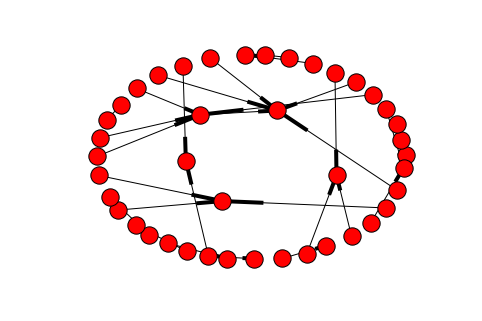

In [8]:
nx.draw(G)

Exporting to Gephi  
https://gephi.org/users/supported-graph-formats/  